# Decision Tree Classifier  

### Load libraries

In [4]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import tree
import matplotlib.pyplot as plt

### Creating DataFrame

In [5]:
df1 = pd.DataFrame(np.random.randint(20,32, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df2 = pd.DataFrame(np.random.randint(33,39, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df3 = pd.DataFrame(np.random.randint(40,49, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df4 = pd.DataFrame(np.random.randint(50,59, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df5 = pd.DataFrame(np.random.randint(60,69, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df6 = pd.DataFrame(np.random.randint(70,79, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df7 = pd.DataFrame(np.random.randint(80,100, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])

df = pd.concat([df1,df2,df3,df4,df5,df6,df7])



df.head()

,s1,s2,s3,s4,s5
0,23,25,29,25,24
1,30,22,26,25,25
2,26,22,22,25,20
3,26,26,31,21,31
4,29,25,25,26,29


In [7]:
df['obtained'] = df.s1 + df.s2 + df.s3 + df.s4 + df.s5
df.head()

,s1,s2,s3,s4,s5,obtained
0,23,25,29,25,24,126
1,30,22,26,25,25,128
2,26,22,22,25,20,115
3,26,26,31,21,31,135
4,29,25,25,26,29,134


In [8]:
df['percentage'] = df.obtained / 500 * 100
df.head()

,s1,s2,s3,s4,s5,obtained,percentage
0,23,25,29,25,24,126,25.2
1,30,22,26,25,25,128,25.6
2,26,22,22,25,20,115,23.0
3,26,26,31,21,31,135,27.0
4,29,25,25,26,29,134,26.8


In [9]:
def grade(x):
    if x >= 80:
        return "A+"
    elif x >= 70:
        return "A"
    elif x >= 60:
        return "B"
    elif x >= 50:
        return "C"
    elif x >= 40:
        return "D"
    elif x >= 33:
        return "E"
    else:
        return "F"
    
df['Grade'] = df.percentage.apply(grade)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,Grade
0,23,25,29,25,24,126,25.2,F
1,30,22,26,25,25,128,25.6,F
2,26,22,22,25,20,115,23.0,F
3,26,26,31,21,31,135,27.0,F
4,29,25,25,26,29,134,26.8,F


### Split dataset in features and target variable

In [10]:
X = df['percentage'] # Features
Y = df['Grade'] # Target variable

In [11]:
X.head()

0    25.2
1    25.6
2    23.0
3    27.0
4    26.8
Name: percentage, dtype: float64

In [12]:
Y.head()

0    F
1    F
2    F
3    F
4    F
Name: Grade, dtype: object

### Converting Pandas series into 2D array

In [13]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

### Split dataset into training set and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% testing data

### Create Decision Tree classifier object

In [15]:
clf = DecisionTreeClassifier()

### Train Decision Tree Classifier Model

In [16]:
clf_model = clf.fit(X_train, y_train)

### Predict the response for test dataset

In [17]:
y_pred = clf.predict(X_test)

### Model Accuracy, how often is the classifier correct?

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 1.0


Comment: Accuracy of our model is 100%

### Plot our Decision Tree

[Text(651.0, 996.6, 'X[0] <= 79.0\ngini = 0.857\nsamples = 24500\nvalue = [3520, 3543, 3516, 3469, 3505, 3494, 3453]\nclass = y[1]'),
 Text(558.0, 815.4000000000001, 'X[0] <= 68.8\ngini = 0.833\nsamples = 20957\nvalue = [3520, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[0]'),
 Text(465.0, 634.2, 'X[0] <= 59.1\ngini = 0.8\nsamples = 17437\nvalue = [0, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[2]'),
 Text(372.0, 453.0, 'X[0] <= 39.1\ngini = 0.75\nsamples = 13921\nvalue = [0, 0, 0, 3469, 3505, 3494, 3453]\nclass = y[4]'),
 Text(186.0, 271.79999999999995, 'X[0] <= 32.0\ngini = 0.5\nsamples = 6947\nvalue = [0, 0, 0, 0, 0, 3494, 3453]\nclass = y[5]'),
 Text(93.0, 90.59999999999991, 'gini = 0.0\nsamples = 3453\nvalue = [0, 0, 0, 0, 0, 0, 3453]\nclass = y[6]'),
 Text(279.0, 90.59999999999991, 'gini = 0.0\nsamples = 3494\nvalue = [0, 0, 0, 0, 0, 3494, 0]\nclass = y[5]'),
 Text(558.0, 271.79999999999995, 'X[0] <= 48.9\ngini = 0.5\nsamples = 6974\nvalue = [0, 0, 0, 3469, 3505, 0, 0]\nclass = y[

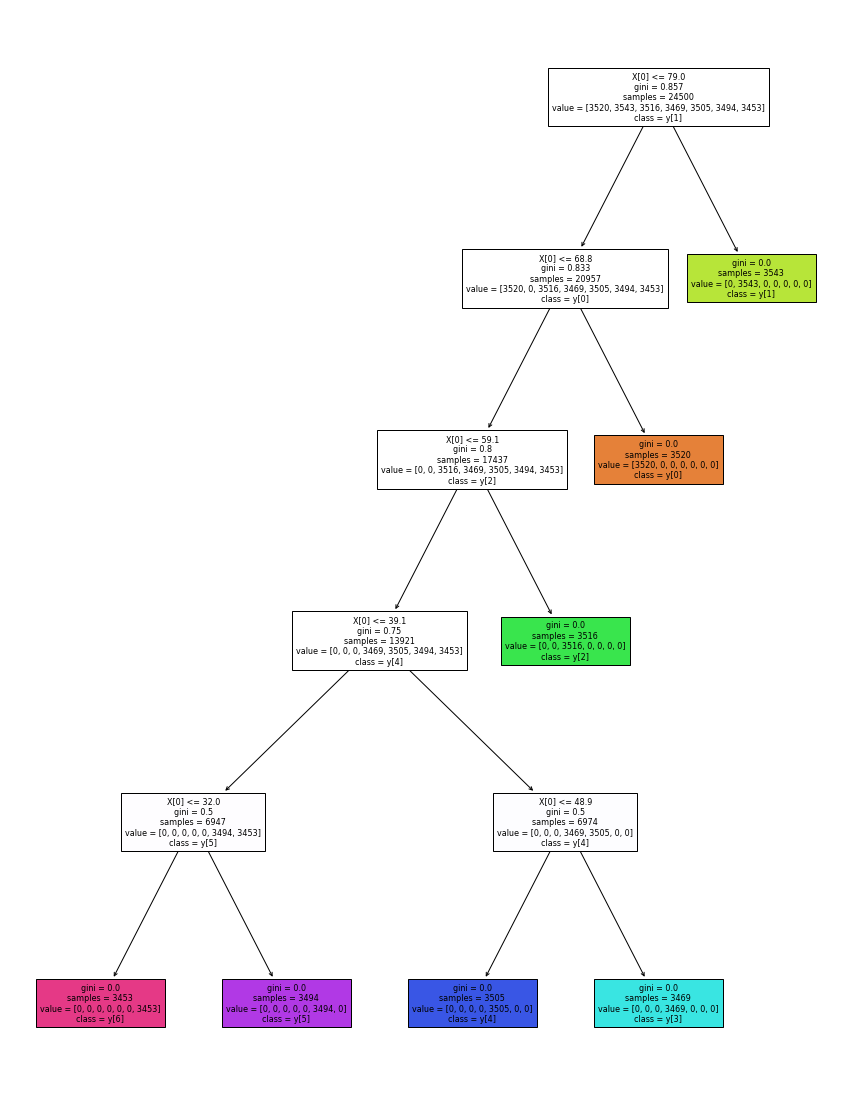

In [19]:
plt.figure(figsize=(15, 20))
tree.plot_tree(clf, filled = tree, class_names = True, fontsize = 8)